In [32]:
import pandas as pd
import numpy as np
import env
import wrangle_zillow
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = env.get_database('zillow')

query = '''
select *, airconditioningdesc, architecturalstyledesc, buildingclassdesc, heatingorsystemdesc, logerror, transactiondate, propertylandusedesc, storydesc, typeconstructiondesc
from properties_2017
left join airconditioningtype using(airconditioningtypeid)
left join heatingorsystemtype using(heatingorsystemtypeid)
left join architecturalstyletype using(architecturalstyletypeid)
left join buildingclasstype using(buildingclasstypeid)
join predictions_2017 using(parcelid)
left join propertylandusetype using(propertylandusetypeid)
left join storytype using(storytypeid)
left join typeconstructiontype using(typeconstructiontypeid);'''

In [3]:
zillow = wrangle_zillow.get_zillow_data(query)

In [4]:
zillow1 = wrangle_zillow.nulvals(zillow)

In [5]:
zillow = wrangle_zillow.drops(zillow, 0.5, 0.5)

In [6]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 2 to 77613
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         77541 non-null  float64
 1   parcelid                      77575 non-null  int64  
 2   heatingorsystemtypeid         49550 non-null  float64
 3   id                            77575 non-null  int64  
 4   bathroomcnt                   77541 non-null  float64
 5   bedroomcnt                    77541 non-null  float64
 6   buildingqualitytypeid         49786 non-null  float64
 7   calculatedbathnbr             76925 non-null  float64
 8   calculatedfinishedsquarefeet  77340 non-null  float64
 9   finishedsquarefeet12          73886 non-null  float64
 10  fips                          77541 non-null  float64
 11  fullbathcnt                   76925 non-null  float64
 12  latitude                      77541 non-null  float64
 13  l

In [20]:
zillow = zillow.drop(columns = ['propertylandusetypeid', 'heatingorsystemtypeid','buildingqualitytypeid', 'finishedsquarefeet12', 'lotsizesquarefeet', 'propertycountylandusecode', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])

In [21]:
zillow = zillow.T.drop_duplicates().T

In [22]:
zillow.head()

,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,...,unitcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,censustractandblock,heatingorsystemdesc,id,logerror,transactiondate,propertylandusedesc
2,14186244,11677,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,...,NaN,1962.0,564778.0,2016.0,60590218022012.0,None,2,0.005383,2017-01-01,Single Family Residential
3,12177905,2288172,3.0,4.0,3.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,...,1.0,1970.0,145143.0,2016.0,60373001001006.0,Central,3,-0.10341,2017-01-01,Single Family Residential
6,12095076,781532,3.0,4.0,3.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,...,1.0,1950.0,773303.0,2016.0,60374608001014.0,Central,6,-0.001011,2017-01-01,Single Family Residential
8,12790562,1246926,3.0,4.0,3.0,3039.0,6037.0,3.0,33960230.0,-118006914.0,...,1.0,1970.0,220583.0,2016.0,60375002024006.0,Central,8,-0.040966,2017-01-02,Single Family Residential
10,11104527,1639362,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,-118464390.0,...,1.0,1999.0,430108.0,2016.0,60379200341014.0,Central,10,0.005963,2017-01-02,Single Family Residential


In [23]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 2 to 77613
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   parcelid                      77575 non-null  object
 1   id                            77575 non-null  object
 2   bathroomcnt                   77541 non-null  object
 3   bedroomcnt                    77541 non-null  object
 4   calculatedbathnbr             76925 non-null  object
 5   calculatedfinishedsquarefeet  77340 non-null  object
 6   fips                          77541 non-null  object
 7   fullbathcnt                   76925 non-null  object
 8   latitude                      77541 non-null  object
 9   longitude                     77541 non-null  object
 10  propertyzoningdesc            50451 non-null  object
 11  rawcensustractandblock        77541 non-null  object
 12  regionidcity                  76071 non-null  object
 13  regionidcounty  

(-1.0, 1.0)

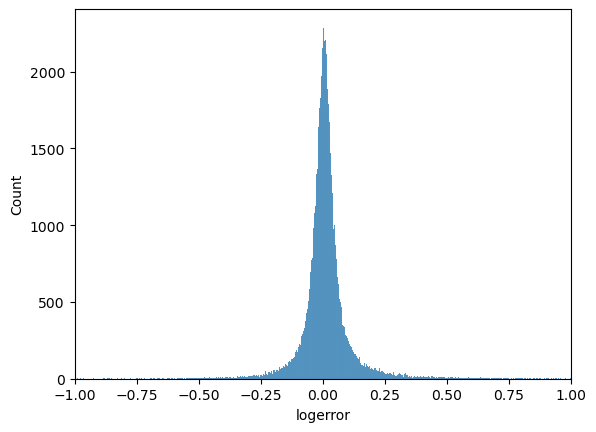

In [33]:
sns.histplot(zillow['logerror'])
plt.xlim(-1,1)